In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)

## General Differential Equation

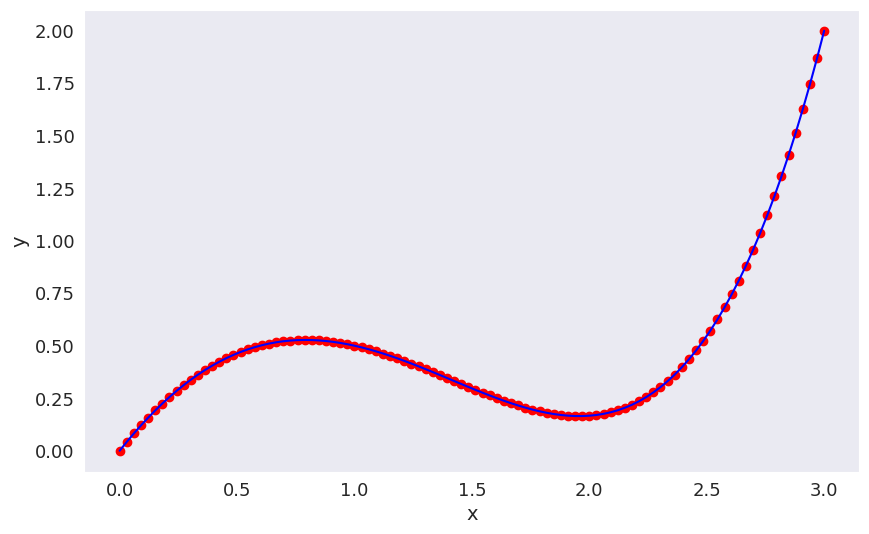

In [22]:
import torch.nn as nn
import torch
import numpy as np
#########
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
########

input_size = 1
hidden_size1 =10
hidden_size2 =10
output_size = 1
#################

N2 = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.Tanh(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.Tanh(),
    nn.Linear(hidden_size2, output_size)
)
##############
N2 = N2.to(device)
##################
def f(x):
    return x**2-2
##########
def loss(x):
    x.requires_grad = True
    y = N2(x)
    dy_dx = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    y_double_prime = torch.autograd.grad(dy_dx.sum(), x, create_graph=True)[0]

    return torch.mean( (y_double_prime - f(x))**2  + (y[0, 0] - 0)**2 + (y[-1, 0] -2)**2)

###################
optimizer = torch.optim.LBFGS(N2.parameters())
###################
x = torch.linspace(0, 3, 100)[:, None]
#################
def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()

    return l
####################
epochs = 10
for i in range(epochs):
    optimizer.step(closure)
#####################
xx = torch.linspace(0, 3, 100)[:, None]
with torch.no_grad():
    yy = N2(xx)
######################
pred=(xx**4/12)-(xx**2)+(51/36)*xx
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(xx, yy,c='blue')
plt.scatter(xx, pred,c='red')
plt.xlabel('x')
plt.ylabel('y')

plt.grid()
plt.show()

#####################

##Bar problem

cost function: 1.2379571
cost function: 0.0001285738
cost function: 4.1035986e-05
cost function: 3.4047567e-05
cost function: 2.905128e-05
cost function: 2.4429612e-05
cost function: 2.0271136e-05
cost function: 1.7206576e-05
cost function: 1.4087257e-05
cost function: 1.1375856e-05


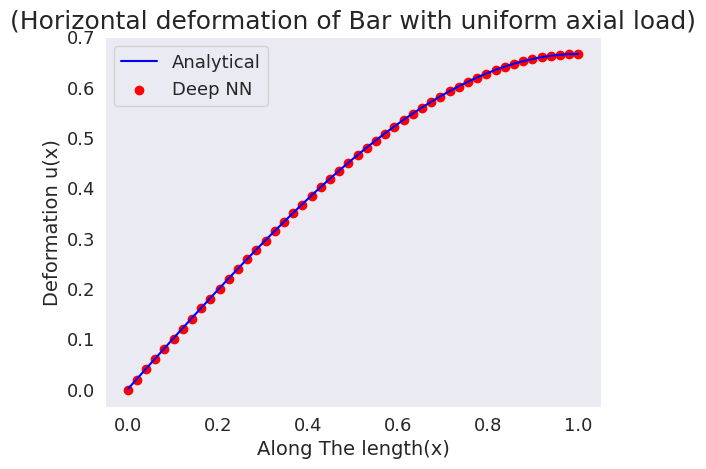

In [23]:
import torch.nn as nn
import torch
import numpy as np

input_size = 1
hidden_size1 =15
hidden_size2 =10

output_size = 1

N2 = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.Tanh(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.Tanh(),
    nn.Linear(hidden_size2, output_size)
)



device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


N2 = N2.to(device)
def f(x):
    return -2*x

def loss(x):
    x.requires_grad = True
    y = N2(x)
    dy_1 = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    dy_2 = torch.autograd.grad(dy_1.sum(), x, create_graph=True)[0]
    dy_3 = torch.autograd.grad(dy_2.sum(), x, create_graph=True)[0]
    dy_4 = torch.autograd.grad(dy_3.sum(), x, create_graph=True)[0]
    ans= torch.mean( (dy_2-f(x))**2  + (y[0, 0] - 0)**2 +(dy_1[-1, 0] - 0)**2 )
    return ans
optimizer = torch.optim.Adam(N2.parameters(),lr=0.01)

x = torch.linspace(0, 1, 50)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()

    return l

epochs = 1000
for i in range(epochs):
    optimizer.step(closure)
    if(i%100==0):
        print('cost function:',loss(x).detach().numpy())


xx = torch.linspace(0, 1, 50)[:, None]
with torch.no_grad():
    yy = N2(xx)
true_y=(-xx**3/3)+(xx)

import matplotlib.pyplot as plt
plt.title('(Horizontal deformation of Bar with uniform axial load)')
plt.plot(xx, true_y,c='blue')
plt.scatter(xx, yy,c='red')
plt.xlabel('Along The length(x)')
plt.ylabel('Deformation u(x)')
plt.legend(['Analytical','Deep NN'])
plt.grid()
plt.show()

cost function: 0.8335669
cost function: 6.710398e-05
cost function: 2.555053e-05
cost function: 1.7530117e-05
cost function: 1.484843e-05
cost function: 1.2978146e-05
cost function: 1.09814455e-05
cost function: 8.8061515e-06
cost function: 6.697924e-06
cost function: 4.9349924e-06
cost function: 3.626734e-06
cost function: 2.7289027e-06
cost function: 2.1316425e-06
cost function: 1.7253004e-06
cost function: 1.4304471e-06


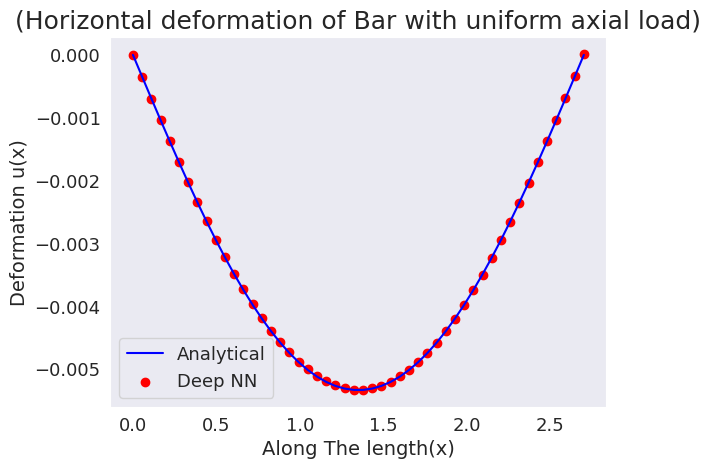

In [35]:
import torch.nn as nn
import torch
import numpy as np

input_size = 1
hidden_size1 =50
hidden_size2 =30
E=200*10**9
I=0.000038929334
L=2.7
w=60*10**3

output_size = 1

N2 = nn.Sequential(
    nn.Linear(input_size, hidden_size1),
    nn.Tanh(),
    nn.Linear(hidden_size1, hidden_size2),
    nn.Tanh(),
    nn.Linear(hidden_size2, output_size)
)



device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


N2 = N2.to(device)
def f(x):
    return -w/(E*I)

def loss(x):
    x.requires_grad = True
    y = N2(x)
    dy_1 = torch.autograd.grad(y.sum(), x, create_graph=True)[0]
    dy_2 = torch.autograd.grad(dy_1.sum(), x, create_graph=True)[0]
    dy_3 = torch.autograd.grad(dy_2.sum(), x, create_graph=True)[0]
    dy_4 = torch.autograd.grad(dy_3.sum(), x, create_graph=True)[0]
    ans= torch.mean((dy_4-f(x))**2 + (y[0, 0] - 0)**2 +(y[-1, 0] - 0)**2+
     (dy_2[0, 0] - 0)**2+(dy_2[-1, 0] - 0)**2  )
    return ans
optimizer = torch.optim.Adam(N2.parameters(),lr=0.01)

x = torch.linspace(0, L, 50)[:, None]

def closure():
    optimizer.zero_grad()
    l = loss(x)
    l.backward()

    return l

epochs =1500
for i in range(epochs):
    optimizer.step(closure)
    if(i%100==0):
        print('cost function:',loss(x).detach().numpy())


xx = torch.linspace(0, L, 50)[:, None]
with torch.no_grad():
    yy = N2(xx)
true_y=w*(-xx**4+2*L*xx**3-L**3*xx)/(24*E*I)

import matplotlib.pyplot as plt
plt.title('(Horizontal deformation of Bar with uniform axial load)')
plt.plot(xx, true_y,c='blue')
plt.scatter(xx, yy,c='red')
plt.xlabel('Along The length(x)')
plt.ylabel('Deformation u(x)')
plt.legend(['Analytical','Deep NN'])
plt.grid()
plt.show()